Below are the key function froms keras, which will be used throughout the course.


---


**Dense()**
This function will be used to create our regular densely-connected neural network layer. There are many parameters accepted by this function, but we will mainly use the parameters below:

units - the number of neurons (nodes) in a layer. In other words, the dimensionality of output space.
activation - the type of activation function for this layer. We will discuss the types of activation functions last.


---


**Dropout**()
The dropout layer randomly sets the neurons or nodes of a layer to 0 with a frequency of the rate at each step during training time, which helps prevent overfitting. We pass the value of rate as a parameter, i.e., how many neurons in a layer we want to be set to 0.


---


**Flatten**()
This function is used to convert the shape of the data to a single column vector. For example, after passing the input to the dropout layer, we get a shape of (1, 10, 64) then, after applying the flattening we get the shape as (640,).


---


**Conv2D**()
This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. In other words, this function is used to perform the convolution operation on the data. There are many parameters accepted by this function but we will mainly use the following parameters:

filters - the number of filters we need or the number of feature maps we want after performing the convolution step.
kernel_size - the size of the filter. In the project below, we will see what type of values we should give for better performance.
activation - the type of activation function for this layer. We will discuss the types of activation functions last.
input_shape - the shape of the input that our model will expect. When we use the layer as the first layer in a model, we need to provide the keyword argument input_shape at that time only. For colored images, we will pass a tuple of three values (three dimensions) because colored images have three color channels.


---


**MaxPooling2D**()
This function performs the max pooling operation. There are many parameters accepted by this function, but we will mainly use the following parameter:

pool_size - the window size over which to take the maximum. If we pass (2, 2) as the value for this parameter, then we will take the max value over a 2 x 2 pooling window.



---


**Key optimizers**
Whenever we compile our model, we need to pass the value of the optimizer parameter in the compile() function. Below are some of the most often used optimizers.

adam optimizer
This is the optimizer that implements the Adam algorithm. Adam optimization is a stochastic gradient descent method that is based on an adaptive estimation of first-order and second-order moments.

sgd optimizer
This is a variation of the gradient descent algorithm. It is essentially gradient descent (with momentum) optimizer.

RMSprop optimizer
This optimizer implements the RMSprop algorithm. The goal of RMSprop is to:

Maintain a moving (discounted) average of the square of gradients.
Divide the gradient by the root of this average.
This implementation of RMSprop uses plain momentum, not Nesterov momentum.


---



**Key activation functions**
Below are the key activation functions that are most often used. These have also been used throughout the course.

sigmoid activation
The sigmoid activation function always returns a value between 0 and 1. Whenever we are working on binary classification, we can use this activation. The mathematical formula is:

sigmoid(x) = \frac{1}{(1 + e^{-x})}
sigmoid(x)= 
(1+e −x)1
​

softmax activation
Softmax converts a real vector to a vector of categorical probabilities. The elements of the output vector are in range (0, 1) and sum to 1. Each vector is handled independently. If we are working with more than two-class classification problems, then we will use softmax as it provides the probability for each of the classes. We can take that class which has the highest probability as our final prediction.

tanh activation
This is the hyperbolic tangent activation function. It returns a value in the range (-1, 1).

ReLU activation
It stands for the Rectified Linear Unit. This activation function returns the element-wise maximum of 0 and the input tensor. The mathematical formula is:

ReLU = max(x, 0)
ReLU=max(x,0), where x = input tensor

In [ ]:
!pip install tensorflow
!pip install keras  --user
from keras.preprocessing import image
from keras.layers import *
from keras.models import * 
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np 
print('Imported Successfully!')

Imported Successfully!


Creating a CNN
The size of the convoluted matrix is given by -

C=((I - F + 2P)/S) + 1 where C is the size of the Convoluted matrix, I is the size of the input matrix, F the size of the filter matrix and P the padding applied to the input matrix.

Here P=0, I=28, F=7 and S=1. There the answer is 22.

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train,X_test = X_train/255.0, X_test/255.0 


In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(10))
model.summary()
#Try this again with activation functions tanh, sigmoid

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 7200)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                72010     
                                                                 
Total params: 72,906
Trainable params: 72,906
Non-trainable params: 0
_________________________________________________________________


Because no padding was specified in the convolutional layer, the output shape is 30 x 30 (32-3+1)
The pooling layer reduces the dimensions by half, hence it becomes 15x15
For the final dense layer, its 7200*10+10 (One weight for each conv layer, per class)

In [ ]:
predictions=model(X_train[:1]).numpy()
predictions
loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#loss function is used to estimate the loss of model so that weights can be updated in the next iteration.
#This loss is equals to negative log probabilty of true classes

In [ ]:
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
history=model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5005 - accuracy: 0.4739 - val_loss: 1.2691 - val_accuracy: 0.5615
Epoch 2/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.2134 - accuracy: 0.5784 - val_loss: 1.1731 - val_accuracy: 0.5903
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1087 - accuracy: 0.6170 - val_loss: 1.1397 - val_accuracy: 0.6045
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0420 - accuracy: 0.6403 - val_loss: 1.1094 - val_accuracy: 0.6173
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9885 - accuracy: 0.6616 - val_loss: 1.0971 - val_accuracy: 0.6143
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9557 - accuracy: 0.6713 - val_loss: 1.0854 - val_accuracy: 0.6261
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9169 - accuracy: 0.6846 - val_loss: 1.0635 -

In [ ]:
test_loss,test_acc= model.evaluate(X_test,Y_test,verbose=2)
print("Test Accuracy",test_acc)

313/313 - 2s - loss: 1.0866 - accuracy: 0.6351 - 2s/epoch - 6ms/step
Test Accuracy 0.6351000070571899


313/313 - 2s - loss: 1.0866 - accuracy: 0.6351 - 2s/epoch - 6ms/step


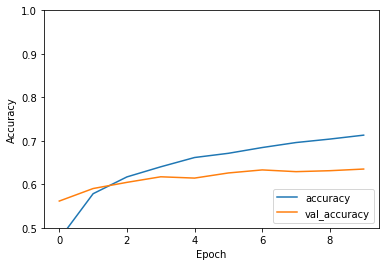

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss,test_acc=model.evaluate(X_test,Y_test,verbose=2)


In [ ]:
probModel = Sequential([model,layers.Softmax()])
predictions = probModel.predict(X_test[:10])
predictions[0]
print(np.argmax(predictions,axis=1))
print(Y_test[:10])

[3 8 8 8 6 6 1 6 3 1]
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


(3, 3, 3, 32)


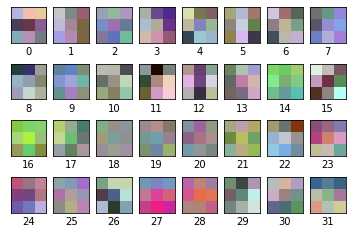

In [ ]:
filters,biases = model.layers[0].get_weights()
f_min,f_max = filters.min(), filters.max()
filters = (filters-f_min)/(f_max-f_min)
print(filters.shape)
n_filters=32
for i in range(n_filters):
  f=filters[:,:,:,i]
  plt.subplot(4,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.xlabel(i)
  plt.imshow(f)
plt.show()